<a href="https://colab.research.google.com/github/neuromorph/TweetEval-Sentiment-HF/blob/main/TweetEval_Sentiment_HuggingFace.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install -q transformers datasets

     |████████████████████████████████| 4.0 MB 4.2 MB/s 
     |████████████████████████████████| 325 kB 48.5 MB/s 
     |████████████████████████████████| 880 kB 49.7 MB/s 
     |████████████████████████████████| 596 kB 42.0 MB/s 
     |████████████████████████████████| 77 kB 6.9 MB/s 
     |████████████████████████████████| 6.6 MB 48.9 MB/s 
     |████████████████████████████████| 212 kB 52.9 MB/s 
     |████████████████████████████████| 1.1 MB 42.5 MB/s 
     |████████████████████████████████| 136 kB 45.8 MB/s 
     |████████████████████████████████| 127 kB 55.3 MB/s 
     |████████████████████████████████| 271 kB 40.2 MB/s 
     |████████████████████████████████| 94 kB 3.2 MB/s 
     |████████████████████████████████| 144 kB 53.1 MB/s 
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
datascience 0.10.6 requires folium==0.2.1, but you have folium 0.8.3 which i

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import transformers, datasets

In [3]:
from datasets import load_dataset

In [4]:
senti_ds = load_dataset("tweet_eval", "sentiment")
senti_ds

Extracting data files:   0%|          | 0/6 [00:00<?, ?it/s]

Generating train split:   0%|          | 0/45615 [00:00<?, ? examples/s]

Generating test split:   0%|          | 0/12284 [00:00<?, ? examples/s]

Generating validation split:   0%|          | 0/2000 [00:00<?, ? examples/s]

Dataset tweet_eval downloaded and prepared to /root/.cache/huggingface/datasets/tweet_eval/sentiment/1.1.0/12aee5282b8784f3e95459466db4cdf45c6bf49719c25cdb0743d71ed0410343. Subsequent calls will reuse this data.


  0%|          | 0/3 [00:00<?, ?it/s]

DatasetDict({
    train: Dataset({
        features: ['text', 'label'],
        num_rows: 45615
    })
    test: Dataset({
        features: ['text', 'label'],
        num_rows: 12284
    })
    validation: Dataset({
        features: ['text', 'label'],
        num_rows: 2000
    })
})

In [5]:
train_ds = senti_ds["train"]
train_ds

Dataset({
    features: ['text', 'label'],
    num_rows: 45615
})

In [6]:
train_ds[0], len(train_ds)

({'label': 2,
  'text': '"QT @user In the original draft of the 7th book, Remus Lupin survived the Battle of Hogwarts. #HappyBirthdayRemusLupin"'},
 45615)

In [7]:
train_df = pd.DataFrame(train_ds)
# train_df = senti_df["train"][:]
train_df.head()

,text,label
0,"""QT @user In the original draft of the 7th boo...",2
1,"""Ben Smith / Smith (concussion) remains out of...",1
2,Sorry bout the stream last night I crashed out...,1
3,Chase Headley's RBI double in the 8th inning o...,1
4,@user Alciato: Bee will invest 150 million in ...,2


In [8]:
def label_int2str(row):
    return train_ds.features["label"].int2str(row)

train_df["label_name"] = train_df["label"].apply(label_int2str)
train_df.head()

,text,label,label_name
0,"""QT @user In the original draft of the 7th boo...",2,positive
1,"""Ben Smith / Smith (concussion) remains out of...",1,neutral
2,Sorry bout the stream last night I crashed out...,1,neutral
3,Chase Headley's RBI double in the 8th inning o...,1,neutral
4,@user Alciato: Bee will invest 150 million in ...,2,positive


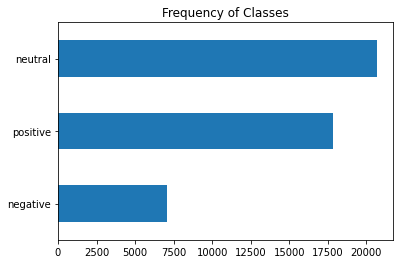

In [9]:

train_df["label_name"].value_counts(ascending=True).plot.barh()
plt.title("Frequency of Classes")
plt.show()

/usr/local/lib/python3.7/dist-packages/matplotlib/cbook/__init__.py:1376: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  X = np.atleast_1d(X.T if isinstance(X, np.ndarray) else np.asarray(X))


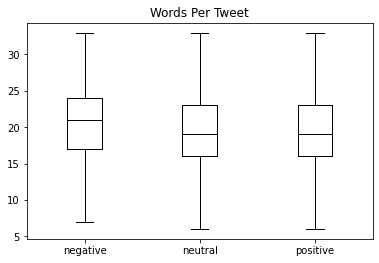

In [ ]:
train_df["Words Per Tweet"] = train_df["text"].str.split().apply(len)
train_df.boxplot("Words Per Tweet", by="label_name", grid=False,
          showfliers=False, color="black")
plt.suptitle("")
plt.xlabel("")
plt.show()

In [9]:
from transformers import AutoTokenizer, DataCollatorWithPadding

model_ckpt = "distilbert-base-uncased"
tokenizer = AutoTokenizer.from_pretrained(model_ckpt)

Downloading:   0%|          | 0.00/28.0 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/483 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/226k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/455k [00:00<?, ?B/s]

In [10]:

def tokenize(batch):
    return tokenizer(batch["text"], truncation=True)
    
tokenize(train_ds[0])

{'input_ids': [101, 1000, 1053, 2102, 1030, 5310, 1999, 1996, 2434, 4433, 1997, 1996, 5504, 2338, 1010, 2128, 7606, 11320, 8091, 5175, 1996, 2645, 1997, 27589, 18367, 2015, 1012, 1001, 3407, 17706, 2705, 10259, 28578, 2271, 7630, 8091, 1000, 102], 'attention_mask': [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]}

In [11]:
train_ds[0]

{'label': 2,
 'text': '"QT @user In the original draft of the 7th book, Remus Lupin survived the Battle of Hogwarts. #HappyBirthdayRemusLupin"'}

In [21]:
senti_tok = senti_ds.map(tokenize, batched=True, batch_size=None)
data_collator = DataCollatorWithPadding(tokenizer=tokenizer)

senti_tok = senti_tok.remove_columns(['text'])


Loading cached processed dataset at /root/.cache/huggingface/datasets/tweet_eval/sentiment/1.1.0/12aee5282b8784f3e95459466db4cdf45c6bf49719c25cdb0743d71ed0410343/cache-8f825ac315f44b6f.arrow
Loading cached processed dataset at /root/.cache/huggingface/datasets/tweet_eval/sentiment/1.1.0/12aee5282b8784f3e95459466db4cdf45c6bf49719c25cdb0743d71ed0410343/cache-589a0a21d13cff65.arrow
Loading cached processed dataset at /root/.cache/huggingface/datasets/tweet_eval/sentiment/1.1.0/12aee5282b8784f3e95459466db4cdf45c6bf49719c25cdb0743d71ed0410343/cache-2425db9ecc1a1f60.arrow


In [28]:
senti_tok["train"], senti_tok["validation"], senti_tok["test"]

(Dataset({
     features: ['label', 'input_ids', 'attention_mask'],
     num_rows: 45615
 }), Dataset({
     features: ['label', 'input_ids', 'attention_mask'],
     num_rows: 2000
 }), Dataset({
     features: ['label', 'input_ids', 'attention_mask'],
     num_rows: 12284
 }))

In [23]:
import torch
from transformers import AutoModelForSequenceClassification

num_labels = 3
device = torch.device("cuda") if torch.cuda.is_available() else torch.device("cpu")
model = (AutoModelForSequenceClassification
         .from_pretrained(model_ckpt, num_labels=num_labels)
         .to(device))
device, torch.cuda.get_device_name(0)

device(type='cuda')

In [2]:
# import torch
# torch.cuda.is_available()

True

In [24]:
import sklearn
from sklearn.metrics import accuracy_score, f1_score

def compute_metrics(pred):
    labels = pred.label_ids
    preds = pred.predictions.argmax(-1)
    f1 = f1_score(labels, preds, average="weighted")
    acc = accuracy_score(labels, preds)
    return {"accuracy": acc, "f1": f1}

In [18]:

from huggingface_hub import notebook_login
notebook_login()

Login successful
Your token has been saved to /root/.huggingface/token
Authenticated through git-credential store but this isn't the helper defined on your machine.
You might have to re-authenticate when pushing to the Hugging Face Hub. Run the following command in your terminal in case you want to set this credential helper as the default

git config --global credential.helper store


In [25]:
from transformers import Trainer, TrainingArguments

batch_size = 128
logging_steps = len(senti_tok["train"]) // batch_size
model_name = f"{model_ckpt}-finetuned-tweet_eval-sentiment"
training_args = TrainingArguments(output_dir=model_name,
                                  num_train_epochs=4,
                                  learning_rate=2e-5,
                                  fp16=True,
                                  per_device_train_batch_size=batch_size,
                                  per_device_eval_batch_size=batch_size,
                                  weight_decay=0.01,
                                  evaluation_strategy="epoch",
                                  disable_tqdm=False,
                                  logging_steps=logging_steps,
                                  push_to_hub=True,
                                  log_level="error")

In [26]:
# from transformers import Trainer

trainer = Trainer(model=model, args=training_args,
                  compute_metrics=compute_metrics,
                  train_dataset=senti_tok["train"],
                  eval_dataset=senti_tok["validation"],
                  tokenizer=tokenizer)
trainer.train();

/content/distilbert-base-uncased-finetuned-tweet_eval-sentiment is already a clone of https://huggingface.co/deepgai/distilbert-base-uncased-finetuned-tweet_eval-sentiment. Make sure you pull the latest changes with `repo.git_pull()`.
/usr/local/lib/python3.7/dist-packages/transformers/optimization.py:309: FutureWarning: This implementation of AdamW is deprecated and will be removed in a future version. Use the PyTorch implementation torch.optim.AdamW instead, or set `no_deprecation_warning=True` to disable this warning
  FutureWarning,


Epoch,Training Loss,Validation Loss,Accuracy,F1
1,0.707500,0.645882,0.722500,0.720229
2,0.575600,0.626044,0.717000,0.719486
3,0.510500,0.630513,0.735500,0.735197
4,0.465300,0.637455,0.733000,0.733406


In [27]:

preds_valid = trainer.predict(senti_tok["validation"])
preds_valid

PredictionOutput(predictions=array([[-3.498 ,  2.238 ,  0.896 ],
       [-3.31  ,  0.6953,  2.596 ],
       [-1.195 ,  1.555 , -0.3865],
       ...,
       [-3.559 ,  0.7744,  2.428 ],
       [ 1.6045, -0.2235, -1.707 ],
       [-3.701 ,  2.135 ,  1.255 ]], dtype=float16), label_ids=array([1, 2, 0, ..., 2, 1, 1]), metrics={'test_loss': 0.6374549269676208, 'test_accuracy': 0.733, 'test_f1': 0.7334064833110073, 'test_runtime': 17.0511, 'test_samples_per_second': 117.294, 'test_steps_per_second': 0.938})

In [29]:
preds_test = trainer.predict(senti_tok["test"])
preds_test.metrics

{'test_accuracy': 0.6927710843373494,
 'test_f1': 0.6926590404639306,
 'test_loss': 0.7172134518623352,
 'test_runtime': 96.6403,
 'test_samples_per_second': 127.11,
 'test_steps_per_second': 0.993}

In [20]:
# import os
# try:
#     device_name = os.environ['COLAB_TPU_ADDR']
#     TPU_ADDRESS = 'grpc://' + device_name
#     print('Found TPU at: {}'.format(TPU_ADDRESS))
# except KeyError:
#     print('TPU not found')

Found TPU at: grpc://10.19.119.66:8470


In [21]:
# pip install cloud-tpu-profiler

In [ ]:
# !capture_tpu_profile --service_addr 10.19.119.66:8470 --monitoring_level 2

In [26]:
# import subprocess
# subprocess.Popen(["capture_tpu_profile", "--service_addr={}".format(os.environ['COLAB_TPU_ADDR'])])

In [3]:
!pip install GPUtil
from GPUtil import showUtilization as gpu_usage
gpu_usage()

  Created wheel for GPUtil: filename=GPUtil-1.4.0-py3-none-any.whl size=7411 sha256=1b09fb1eb6d4404a9766db0aeca973b58b336b9ea66990bf23c404dd8f626ff6
  Stored in directory: /root/.cache/pip/wheels/6e/f8/83/534c52482d6da64622ddbf72cd93c35d2ef2881b78fd08ff0c
Successfully built GPUtil
| ID | GPU | MEM |
------------------
|  0 |  0% |  0% |


In [ ]:
gpu_usage()